# Laboratório de Python da disciplina EDB - UFMG

##  Soluções de algumas EDPs.

Neste tutorial vamos utilizar várias bibliotecas de Python para verificar que certas 
funções satisfazem algumas EDPs e também para graficar essas funções.


**Conteúdos:**

[1. Configurações iniciais.](#sec1) 

[2. Algumas soluções da equação de Laplace bidimensional.](#sec2)

[3. O Princípio de Superposição.](#sec3)

[4. Núcleo do calor.](#sec4)

[5. Equação da superfície mínima.](#sec5)

[6. Referências.](#sec6)


<div id="sec1"></div> 

## 1. Configurações iniciais.

In [1]:
#Importamos a biblioteca SymPy para fazer cálculos simbólicos (ou seja, sem avaliar as expressões).
import sympy as sp

#Importamos algumas funções do módulo display da biblioteca IPython para obter uma impressão mais agradável.
from IPython.display import display, Math

#Importamos a biblioteca NumPy.
import numpy as np

#Importamos o módulo pyplot da biblioteca Matplotlib para fazer gráficos.
import matplotlib.pyplot as plt

<div id="sec2"></div> 

## 2. Algumas soluções da equação de Laplace bidimensional.

A seguir verificaremos que as funções $u_1(x,y) = x$ e $u_2(x,y) = x^2 - y^2$ são soluções da equação de Laplace 2D:

$$\partial^2_x u + \partial^2_y u = 0.$$

### 2.1 Verificar que $u_1(x,y) = x$ é solução.

In [2]:
#Definimos as variáveis simbólicas x e y
x, y = sp.symbols('x y')
#Definimos u_1 como expressão de x
u1 = x

In [3]:
#Calculamos a segunda derivada de u1 em relação a x
der_u1_2_x = sp.diff(u1, x, 2)
display(Math(f'\\partial^2_x u_1(x,y) = {der_u1_2_x}'))
#Calculamos a segunda derivada de u2 em relação a y
der_u1_2_y = sp.diff(u1, y, 2)
display(Math(f'\\partial^2_y u_1(x,y) = {der_u1_2_y}'))
#Somamos as derivadas
display(Math(f'\\partial^2_x u_1(x,y) + \\partial^2_y u_1(x,y) = {der_u1_2_x + der_u1_2_y}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Conclusão: $u_1$ é solução da equação de Laplace 2D.

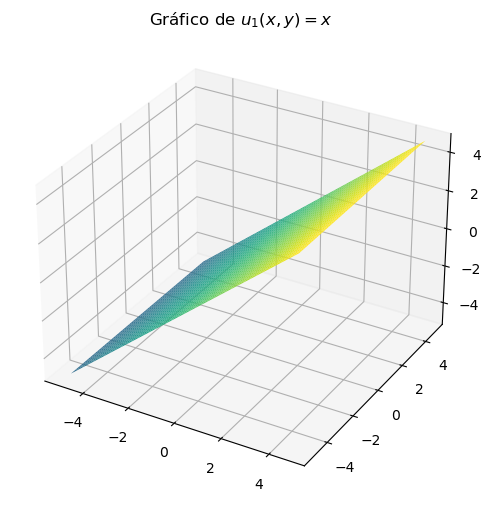

In [4]:
#Gráfico da solução
a = 5
# Criar malha de pontos no quadrado [-a,a]x[-a,a]
malha_x = np.arange(-a, a, 0.25)
malha_y = np.arange(-a, a, 0.25)
#X,Y contêm os pontos da malha quadrada
X, Y = np.meshgrid(malha_x, malha_y)
#Valores da função u_1(x,y) = x, eles correspondem ao eixo z.
Z = X

# Plotar a superfície
#subplot_kw={"projection": "3d"} indica que o gráfico é tridimensional
fig, ax = plt.subplots(figsize = (6,6), subplot_kw={"projection": "3d"})

ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap='viridis')

plt.title(f'Gráfico de $u_1(x,y) = x$')

plt.show()

### 2.1 Verificar que $u_2(x,y) = x^2 - y^2$ é solução.

In [5]:
#Definimos u_2 como expressão de x e y
u2 = x**2 - y**2

In [6]:
#Calculamos a segunda derivada de u2 em relação a x
der_u2_2_x = sp.diff(u2, x, 2)
display(Math(f'\\partial^2_x u_2(x,y) = {der_u2_2_x}'))
#Calculamos a segunda derivada de u2 em relação a y
der_u2_2_y = sp.diff(u2, y, 2)
display(Math(f'\\partial^2_y u_2(x,y) = {der_u2_2_y}'))
#Somamos as derivadas
display(Math(f'\\partial^2_x u_2(x,y) + \\partial^2_y u_2(x,y) = {der_u2_2_x + der_u2_2_y}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

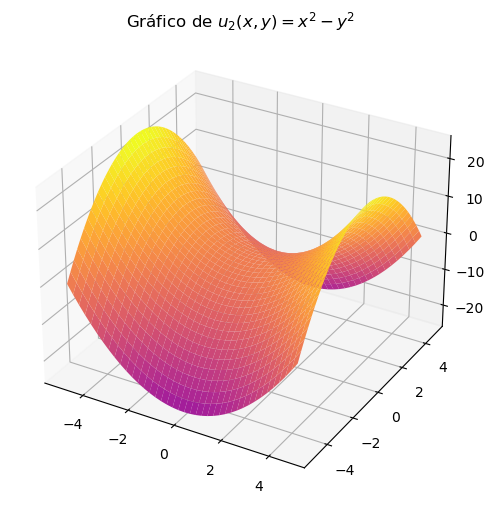

In [7]:
#Gráfico da solução
a = 5

# Criar malha de pontos no quadrado [-a,a]x[-a,a]
malha_x = np.arange(-a, a, 0.25)
malha_y = np.arange(-a, a, 0.25)
#X,Y contêm os pontos da malha
X, Y = np.meshgrid(malha_x, malha_y)

#Valores da função u_2(x,y) = x^2-y^2, eles correspondem ao eixo z.
Z = X**2 - Y**2

# Plotar a superfície

fig, ax = plt.subplots(figsize = (6,6), subplot_kw={"projection": "3d"})

ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap='plasma')

plt.title(f'Gráfico de $u_2(x,y) = x^2 - y^2$')

plt.show()

<div id="sec3"></div> 

## 3. O Princípio de Superposição.

A seguir comprovaremos que a combinação linear das soluções obtidas também é solução pois a equação de Laplace é linear e homogênea.

In [8]:
#Definimos os coeficientes da combinação linear como variáveis simbólicas
alpha, beta = sp.symbols('alpha beta')
#Definimos v como combinação linear de u1 e u2 com coeficientes alpha e beta
v = alpha * u1 + beta * u2

$$v(x,y) = \alpha u_1(x,y) + \beta u_2(x,y)$$

In [9]:
#Calculamos a segunda derivada de v em relação a x
der_v_2_x = sp.diff(v, x, 2)
#sp.latex serve apenas para melhorar a estética das expressões matemáticas
display(Math(f'\\partial^2_x v(x,y) = {sp.latex(der_v_2_x)}'))
#Calculamos a segunda derivada de v em relação a y
der_v_2_y = sp.diff(v, y, 2)
display(Math(f'\\partial^2_y v(x,y) = {sp.latex(der_v_2_y)}'))
#Somamos as derivadas
display(Math(f'\\partial^2_x v(x,y) + \\partial^2_y v(x,y) = {der_v_2_x + der_v_2_y}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Perceba que o resultado não depende dos valores das constantes $\alpha$ e $\beta$. Elas foram definidas como variáveis simbólicas. Portanto, o nosso resultado vale para quaisquer valores dessas constantes.

Assim, fica comprovado o Princípio da Superposição, neste caso particular.

No entanto, para fazer o gráfico, precisaremos fixar valores para essas constantes.

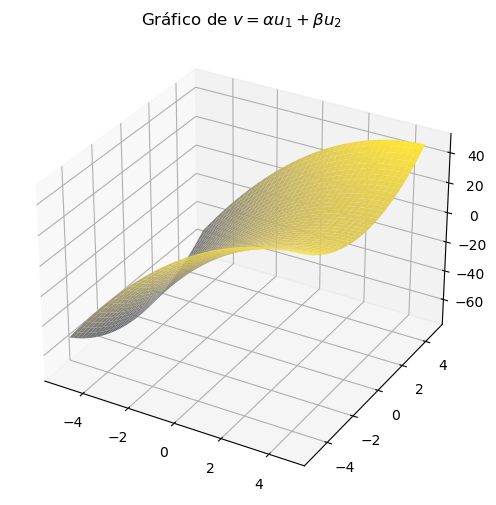

In [10]:
#Gráfico da solução
a = 5

# Criar malha de pontos no quadrado [-a,a]x[-a,a]
malha_x = np.arange(-a, a, 0.25)
malha_y = np.arange(-a, a, 0.25)
#X,Y contêm os pontos da malha
X, Y = np.meshgrid(malha_x, malha_y)

#Valores de alpha e beta.
#Você pode modificá-los à vontade
alpha = 10
beta = -1

#Valores da função v(x,y) = alpha*u_1(x,y) + u_2(x,y), eles correspondem ao eixo z.
Z = alpha * X + beta * (X**2 - Y**2)

# Plotar a superfície

fig, ax = plt.subplots(figsize = (6,6), subplot_kw={"projection": "3d"})

ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap='cividis')

plt.title(r'Gráfico de $v = \alpha u_1+ \beta u_2$')

plt.show()

<div id="sec4"></div> 

## 4. O núcleo do calor.

Verificaremos a seguir que a função $u(x,t) = t^{-1/2} e^{-\frac{x^2}{4t}}$ satisfaz a equação do calor 1D com $k=1$: $\partial_t u = \partial^2_x u.$

In [11]:
#Definimos x e t como variáveis simbólicas
x, t = sp.symbols('x t')

In [12]:
#Definimos u como expressão de x e t
u = t**(-1/2)*sp.exp(-(x**2)/(4*t))

In [13]:
#Calculamos a primeira derivada de u em relação a x
der_u_1_t = sp.diff(u, t, 1)
display(Math(f'\\partial_t u(x,t) = {sp.latex(der_u_1_t)}'))
#Calculamos a segunda derivada de u em relação a x
der_u_2_x = sp.diff(u, x, 2)
display(Math(f'\\partial^2_x u(x,t) = {sp.latex(der_u_2_x)}'))
#Substituimos na equação
display(Math(f'\\partial_t u(x,t) - \\partial^2_x u(x,t) = {sp.latex(der_u_1_t - der_u_2_x)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Até aqui não ficou claro se a função de fato satisfaz a equação do calor. A seguir, simplificaremos o termo à direita do sinal de igualdade usando a função `simplify` da biblioteca *SymPy*.

In [14]:
#Substituimos na equação de novo, mas, adicionalmente, simplificamos os termos
display(Math(f'\\partial_t u(x,t) - \\partial^2_x u(x,t) = {sp.simplify(der_u_1_t - der_u_2_x)}'))

<IPython.core.display.Math object>

**Conclusão** : A função $u(x,t) = t^{-1/2} e^{-\frac{x^2}{4t}}$  satisfaz a equação do calor com $k=1$. De fato, veremos no final do semestre, que cada função da família

$$K_t(x) = \frac{1}{\sqrt{4\pi k t }} e^{-\frac{x^2}{4kt}}$$

satisfaz a equação do calor com coeficiente $k$: 

$$\partial_t u = k\partial^2_x u.$$

A família $\{K_t\}_{t>0}$ é chamada de **núcleo do calor**. Depois entenderemos o porquê desse nome.

<div id="sec5"></div> 

## 5. Equação da superfície mínima.

As soluções da EDP
\begin{equation*}
 \left[1+(\partial _y Z )^2\right] \partial^2_x Z - 2 \partial_x Z \partial_y Z \partial_{xy}^2 Z
 +\left[1+(\partial_x Z)^2\right]\partial^2_y Z =0,
\end{equation*}
têm a propriedade de que a superfície  $z=Z(x,y)$ minimiza a área localmente. 

Como entender isto? Por exemplo, imaginemos que retiramos um pequeno fragmento dessa superfície mantendo a curva na beirada fixa. Então entre todos os possíveis retalhos que poderiam cobrir a abertura que ficou na superfície, o de menor área será precisamente o que foi tirado. 

Superfícies com essa propriedade são chamadas de [superfícies mínimas](https://en.wikipedia.org/wiki/Minimal_surface). Por isso, essa equação é chamada de **equação da superfície mínima**. Perceba que ela é uma EDP de segunda ordem que é não linear porque contém termos que são produtos de derivadas da função incógnita.

A seguir, vamos verificar que a função

$$Z(x,y)=\ln\left(\frac{\cos(y)}{\cos (x)}\right)$$

é solução dessa equação.

In [15]:
#Definimos Zf como expressão de x e y
Zf = sp.log(sp.cos(y)/sp.cos(x))
display(Math(f'Z(x,y) = {sp.latex(Zf)}'))

<IPython.core.display.Math object>

In [16]:
#Calculamos a primeira derivada de Zf em relação a x
der_Zf_1_x = sp.diff(Zf, x, 1)
display(Math(f'\\partial_x Z(x,y) = {sp.latex(der_Zf_1_x)}'))
#Calculamos a primeira derivada de Zf em relação a y
der_Zf_1_y = sp.diff(Zf, y, 1)
display(Math(f'\\partial_y Z(x,y) = {sp.latex(der_Zf_1_y)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
#Calculamos a segunda derivada de Zf em relação a x
der_Zf_2_x = sp.diff(Zf, x, 2)
display(Math(f'\\partial^2_x Z(x,y) = {sp.latex(der_Zf_2_x)}'))
#Calculamos a segunda derivada de Zf em relação a y
der_Zf_2_y = sp.diff(Zf, y, 2)
display(Math(f'\\partial^2_y Z(x,y) = {sp.latex(der_Zf_2_y)}'))
#Calculamos a segunda derivada de Zf em relação a y e a x
der_Zf_2_xy = sp.diff(Zf, x, y)
display(Math(f'\\partial_{{xy}}^2 Z(x,y) = {sp.latex(der_Zf_2_xy)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [18]:
#Equação escrita em LaTeX
texto_eq = '\\left[1+(\\partial_y Z )^2\\right] \\partial^2_x Z \
- 2 \\partial_x Z \\partial_y Z \\partial_{{xy}}^2 Z + \\left[1+(\\partial_x Z)^2\\right]\\partial^2_y Z  ='

#Substituimos Z e suas derivadas na EDP
resultado_eq = (1+ der_Zf_1_y**2)*der_Zf_2_x - 2 * der_Zf_1_x * der_Zf_1_y * der_Zf_2_xy +\
(1+ der_Zf_1_x**2)* der_Zf_2_y

#Imprimimos o resultado
display(Math(f'{texto_eq} {sp.latex(resultado_eq)}'))

<IPython.core.display.Math object>

**Conclusão** : A função $\displaystyle Z(x,y)=\ln\left(\frac{\cos(y)}{\cos(x)}\right)$ satisfaz a equação da superfície mínima. 

Seu gráfico corresponde a uma superfície chamada de [superfície mínima de Scherk](https://en.wikipedia.org/wiki/Scherk_surface). Perceba que podemos considerar a função $Z$ com domínio $\displaystyle  \left(-\frac{\pi}{2},\frac{\pi}{2}\right) \times \left(-\frac{\pi}{2},\frac{\pi}{2}\right)$. 

A superfície correspondente é apresentada a seguir.

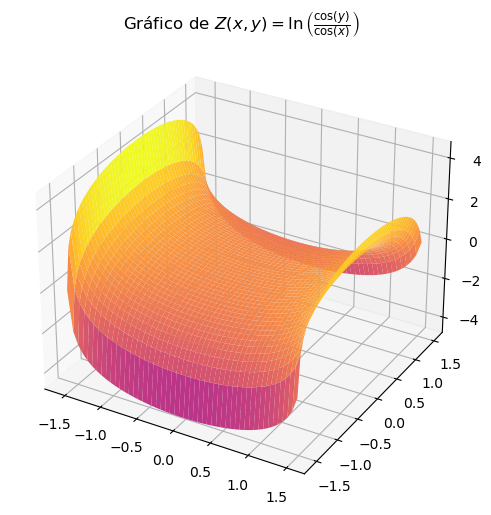

In [19]:
#Gráfico da função Z(x,y) = ln(cos(y)/cos(x))

# Criar malha de pontos no quadrado (-\pi/2,\pi/2)x(-\pi/2,\pi/2)
malha_x = np.linspace(-np.pi/2+0.01, np.pi/2, num=50, endpoint=False)
malha_y = np.linspace(-np.pi/2+0.01, np.pi/2, num=50, endpoint=False)

#X,Y contêm os pontos da malha
X, Y = np.meshgrid(malha_x, malha_y)

#Valores de Z(X,Y). Eles correspondem ao eixo z.
Z = np.log(np.cos(Y)/np.cos(X))

# Plotar a superfície

fig, ax = plt.subplots(figsize = (6,6), subplot_kw={"projection": "3d"})

ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap='plasma')

plt.title(r'Gráfico de $Z(x,y)=\ln\left(\frac{\cos(y)}{\cos (x)}\right)$')

plt.show()

Se gostou da figura, pode dar uma olhada [neste site](https://virtualmathmuseum.org/Surface/gallery_m.html). Tem uma galeria com os gráficos de várias superfícies mínimas.

<div id="sec6"></div> 

## 6. Referências.


+ Tutorial de introdução a SymPy: https://docs.sympy.org/latest/tutorials/intro-tutorial/features.html



+ Documentação do módulo Pyplot: https://matplotlib.org/stable/api/pyplot_summary.html